# Proyek A/B Testing : Mengoptimalkan Sistem Rekomendasi di Platform Belanja Online Internasional

# Pendahuluan <a id='intro'></a>

Suatu peristiwa pada 7 Desember 2020, sebuah eksperimen A/B diluncurkan oleh toko online internasional untuk menguji perubahan terkait penyempurnaan sistem rekomendasi. Nama eksperimen ini adalah "recommender_system_test" dimana sistem terbagi menjadi dua kelompok: Kelompok A sebagai kontrol dan Kelompok B yang melibatkan pengenalan cara melakukan pembayaran baru.

# Tujuan <a id='GoalSet'></a>

- Tujuan Uji Coba: Meneliti dampak perubahan dalam menghadirkan sistem rekomendasi yang lebih unggul dan efektif serta ditingkatkan.
    - Hasil yang Diharapkan: Dalam waktu 14 hari sejak pendaftaran, pengguna akan menunjukkan peningkatan konversi ke tampilan halaman produk (event product_page), tampilan kartu produk (event product_card), dan pembelian (event purchase). Setiap tahap dari funnel product_page → product_card → purchase harus mengalami peningkatan minimal 10%.
    
# Tahapan yang dilakukan<a id='StepbyStep'></a>

Tahapan-tahapan yang akan dilakukan adalah sebagai berikut:

**1. Mengeksplorasi Data:**

   - Konversi Tipe Data: cek semua type data apakah ada yang dikonversi tipe data pada setiap file data yang diberikan.
   - Data Hilang dan Duplikat: Menemukan adanya nilai hilang atau duplikat dalam dataset. Jika ditemukan, buat penjelasan sifat dan dampaknya terhadap analisis.

**2. Melakukan analisis data eksploratif (EDA):**

   - Distribusi jumlah event per pengguna: menelaah lebih dalam apakah jumlah event per pengguna didistribusikan secara merata diantara sampel A dan sampel B.
   - Pengguna yang masuk didalam kedua sampel: mengidentifikasi apakah ada pengguna yang masuk dikedua sampel tersebut, dan jika ada, mengevaluasi dampaknya terhadap hasil uji coba.
   - Distribusi jumlah event per hari: menganalisis cara distribusi jumlah event berdasarkan hari.
   
**3. Menganalisis Konversi diBerbagai Tahap Funnel:**

   - Mengidentifikasi dan menganalisis tingkat konversi pengguna pada setiap tahapan funnel, mulai dari tampilan halaman produk (product_page) ke tampilan kartu produk (product_card) hingga pembelian (purchase)
   
**4. Evaluasi Hasil A/B Test:**

   - Interpretasi hasil A/B test: menyajikan temuan dan kesimpulan dari hasil uji coba A/B, apakah terdapat perbedaan yang signifikan diantara kelompok A (kontrol) dan B (cara melakukan pembayaran baru).
   - Penggunaan Z-Criterion: menggunakan z-criterion untuk memeriksa perbedaan statistik antara proporsi pada kedua kelompok.
   
**Deskripsi Teknis**

1. Test Name: `recommender_system_test`
2. Kelompok: A (kontrol), B (cara melakukan pembayaran baru)
3. Tanggal Peluncuran: 7 Desember 2020
4. Tanggal Berhenti Menerima Pengguna Baru: 21 Desember 2020
5. Tanggal Berakhir: 1 Januari 2021
6. Audience: 15% dari pengguna baru dari wilayah UE (Uni Eropa)
7. Tujuan Uji Coba: Menguji perubahan terkait pengenalan sistem rekomendasi yang ditingkatkan.
8. Hasil yang Diharapkan: Dalam waktu 14 hari sejak pendaftaran, pengguna akan menunjukkan peningkatan konversi ke tampilan halaman produk (event product_page), tampilan kartu produk (event product_card), dan pembelian (event purchase). Setiap tahap dari funnel product_page → product_card → purchase harus mengalami peningkatan minimal 10%.
9. Jumlah Peserta yang Diharapkan: 6000 orang.

**Deskripsi Data**

* `ab_project_marketing_events_us.csv` — kelendar event marketing untuk tahun 2020
* `final_ab_new_users_upd_us.csv` — seluruh pengguna yang mendaftar pada toko online dari tanggal 7 Desember - 21 Desember tahun 2020
* `final_ab_events_upd_us.csv` — seluruh event untuk pengguna baru pada periode 7 Desember 2020 hingga 1 Januari 2021.
* `final_ab_participants_upd_us.csv` — tabel terdiri dari test partisipasi

**field record dari dataset `ab_project_marketing_events_us.csv`:**

* `name` — nama marketing event
* `regions` — wilayah mana yang akan diselenggarakan(ad campaign)
* `start_dt` — tanggal mulai
* `finish_dt` — tanggal berakhir(ad campaign)

**field record dari dataset `final_ab_new_users_upd_us.csv`:**

* `user_id`
* `first_date` — tanggal daftar
* `region`
* `device` — perangkat yang digunakan untuk daftar

**field record dari dataset `final_ab_events_upd_us.csv`:**

* `user_id`
* `event_dt` — tanggal dan waktu event
* `event_name` — jenis event
* `details` — data tambahan terhadap event (contohnya seperti: order total dalam kurs dollar untuk kolom event purchase)

**field record dari dataset `final_ab_participants_upd_us.csv`:**

* `user_id`
* `ab_test` — nama test
* `group` — kelompok test yang dimiliki

# 1. Inisialisasi

* Import library yang diperlukan.

In [ ]:
# list Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
from scipy import stats as st
from datetime import datetime, timedelta
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

# 2. Memuat Dataset

* Memuat data yang telah didefinsikan dan membuat variabel

In [ ]:
# Memuat datasets
proj_mkt_dataframe = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
final_ab_new_users_dataframe = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
final_ab_events_dataframe = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
final_ab_participants_dataframe = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

# 3. Mengeksplorasi Data

* Meneelusuri data yang akan kita eksplorasi dan menemukan sebuah temuan untuk pengaruh analisis. Kita mulai tahapan ini sebagai Pra-pemrosesan data ke dalam sub bab.

**Pra-pemrosesan Data proj_mkt_dataframe**

* Melakukan pra-pemrosesan data untuk proj_mkt_dataframe

In [ ]:
# Menampilkan informasi hasil proj_mkt_dataframe
proj_mkt_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


**<font color="green">Temuan</font>**

* Tidak ada nilai yang hilang untuk dataframe proj_mkt_dataframe.

In [ ]:
# Menampilkan informasi hasil proj_mkt_dataframe
proj_mkt_dataframe

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


**<font color="green">Temuan</font>**

* Kita akan ubah tipe data start_dt dan finish_dt menjadi to_datetime

In [ ]:
# Mengubah tipe data pada dataframe proj_mkt_dataframe
proj_mkt_dataframe['start_dt'] = pd.to_datetime(proj_mkt_dataframe['start_dt'])
proj_mkt_dataframe['finish_dt'] = pd.to_datetime(proj_mkt_dataframe['finish_dt'])

In [ ]:
# Menampilkan kembali informasi proj_mkt_dataframe
proj_mkt_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [ ]:
# Menampilkan kembali isi dari proj_mkt_dataframe
proj_mkt_dataframe

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


**<font color="green">Temuan</font>**

* Tidak ada nilai yang hilang untuk `proj_mkt_dataframe`, namun kita telah mengubah tipe data date menjadi to_datetime untuk kolom yang dibutuhkan konversi.

**Pra-pemrosesan Data final_ab_new_users_dataframe**

* Melakukan pra-pemrosesan data untuk final_ab_new_users_dataframe

In [ ]:
# Menampilkan informasi hasil dari dataframe final_ab_new_users_dataframe
final_ab_new_users_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


**<font color="green">Temuan</font>**

* Tidak ditemukan nilai yang hilang untuk dataframe final_ab_new_users_dataframe

In [ ]:
# Menampilkan isi dari dataframe final_ab_new_users_dataframe
final_ab_new_users_dataframe

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
58698,1DB53B933257165D,2020-12-20,EU,Android
58699,538643EB4527ED03,2020-12-20,EU,Mac
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone


**<font color="green">Temuan</font>**

* Kita akan mengubah tipe data first_date menjadi to_datetime.

In [ ]:
# Mengubah tipe data kolom first_date
final_ab_new_users_dataframe['first_date'] = pd.to_datetime(final_ab_new_users_dataframe['first_date'])

In [ ]:
# Menampilkan kembali informasi dataframe final_ab_new_users_dataframe
final_ab_new_users_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [ ]:
# Memeriksa kembali isi dari dataframe final_ab_new_users_dataframe
final_ab_new_users_dataframe

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
58698,1DB53B933257165D,2020-12-20,EU,Android
58699,538643EB4527ED03,2020-12-20,EU,Mac
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone


**<font color="green">Kesimpulan Sementara</font>**

* Tidak ada nilai yang hilang untuk dataframe `final_ab_new_users_dataframe` dan hanya satu kolom yang kita konversi menjadi to_datetime yaitu first_date.

**Pra-pemrosesan Data final_ab_events_dataframe**

* Melakukan pra-pemrosesan data untuk final_ab_events_dataframe

In [ ]:
# Menampilkan informasi dataframe final_ab_events_dataframe
final_ab_events_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


**<font color="green">Temuan</font>**

* Terdapat nilai hilang pada kolom `details`.

Mari kita amati seberapa besar pesentase hilangnya nilai tersebut.

In [ ]:
missing_percentage = final_ab_events_dataframe.isnull().mean() * 100
missing_percentage

user_id        0.000000
event_dt       0.000000
event_name     0.000000
details       85.766977
dtype: float64

**<font color="green">Temuan</font>**

* Nilai yang hilang sangat besar. Hal tersebut akan memungkinkan sangat berpengaruh pada kepentingan analisis.

In [ ]:
# Menampilkan isi dari dataframe final_ab_events_dataframe
final_ab_events_dataframe

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [ ]:
# Menampilkan isi dari dataframe final_ab_events_dataframe
final_ab_events_dataframe.head(35)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


**<font color="green">Temuan</font>**

* Apakah selain hilangnya nilai kita bisa melihat ada outliers di dalamnya? Seperti nilai 499.99

In [ ]:
# Menampilkan isi dari dataframe final_ab_events_dataframe
final_ab_events_dataframe.tail(35)

,user_id,event_dt,event_name,details
423726,114953E781C03385,2020-12-30 19:45:10,login,NaN
423727,EC9AFCC18F1CF6D9,2020-12-30 16:26:24,login,NaN
423728,07C004DB8325E140,2020-12-30 22:39:42,login,NaN
423729,BFC2CBC616B6BF22,2020-12-30 11:30:11,login,NaN
423730,5C31C0607EFC3C98,2020-12-30 01:56:08,login,NaN
423731,56AF59723683AC41,2020-12-30 09:51:50,login,NaN
423732,EB0F26AAB494131C,2020-12-30 00:30:45,login,NaN
423733,75845C83258FBF73,2020-12-30 06:42:52,login,NaN
423734,F9452D9C3B463498,2020-12-30 20:41:37,login,NaN
423735,4584E51B99DE51AE,2020-12-30 07:39:32,login,NaN


**<font color="green">Temuan</font>**

* Kita harus mengetahui event apa saja yang dimiliki untuk melakukan proses. Jika kita lihat bahwa details terhadap nilai purchase dalam kolom event, bisa dipastikan itu adalah sebuah jumlah uang yang dikeluarkan. Hal ini dikarenakan nilai details adalah float.

In [ ]:
# Menampilkan nilai unik untuk kolom event_name
unique_event_names = final_ab_events_dataframe['event_name'].unique()

In [ ]:
unique_event_names

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [ ]:
final_ab_events_dataframe[final_ab_events_dataframe['event_name'] ==  'purchase']

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
60309,1455450835F72F5E,2020-12-30 09:27:10,purchase,4.99
60310,339C4C55021A83C6,2020-12-30 12:55:08,purchase,9.99
60311,D1553B56FFA8974B,2020-12-30 03:15:35,purchase,4.99
60312,245E85F65C358E08,2020-12-30 19:35:55,purchase,9.99


**<font color="green">Temuan</font>**

* Bisa dipastikan yang memiliki nilai kosong hanyalah `product_cart`, `product_page`, dan `login`. Kita jangan mengisi nilai kosong terlebih dahulu, karena kita wajib mengetahui keterkaitan antara nilai-nilai tersebut. Karena nilai purchase memiliki jumlah nilai yang pas hilang nya yaitu 60314 dari 423761.

In [ ]:
# Mengubah tipe data event_dt untuk dataframe final_ab_events_dataframe
final_ab_events_dataframe['event_dt'] = pd.to_datetime(final_ab_events_dataframe['event_dt'])

In [ ]:
# Menampilkan informasi final_ab_events_df
final_ab_events_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [ ]:
# Menampilkan isi dari final_ab_events_dataframe
final_ab_events_dataframe

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


**<font color="green">Kesimpulan Sementara</font>**

* Kita akan biarkan nilai kosong terlebih dahulu untuk dataframe `final_ab_events_dataframe`, karena kita harus mengetahui relevansi untuk masing-masing nilai terhadap kolom `details`.

**Pra-pemrosesan Data final_ab_participants_dataframe**

* Selanjutnya kita akan melakukan pra-pemrosesan data untuk dataframe `final_ab_participants_dataframe`

In [ ]:
# Menampilkan informasi dari dataframe final_ab_participants_dataframe
final_ab_participants_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [ ]:
# Menampilkan isi dari dataframe final_ab_participants_dataframe
final_ab_participants_dataframe

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


**<font color="green">Temuan</font>**

* Semua dataframe sudah sesuai tidak ada yang harus dikonversi untuk `final_ab_participants_dataframe`

**<font color="green">Kesimpulan Sementara</font>**

* Sesuai namanya dataframe `final_ab_participants_dataframe` merupakan isi dari masing-masing kelompok. Selanjutnya kita akan banyak menggunakan sample dari dataframe tersebut.

# 4. Melakukan Analisis Data Eksploratif (EDA)

* Kita akan melakukan exploratory data analysis.
* Untuk melakukan ini kita harus menjawab tahapan yang sudah diuraikan.

**Distribusi Jumlah Event per Pengguna:**

* Menyelidiki apakah jumlah event per pengguna didistribusikan secara merata diantara sampel A dan sampel B.

In [ ]:
# Mengabungkan dataframe `final_ab_events_dataframe` dan `final_ab_participants_dataframe`
merged_event_par_df = pd.merge(final_ab_events_dataframe, final_ab_participants_dataframe, on='user_id', how='left')

* Mengabungkan DataFrame `final_ab_events_dataframe` dengan `final_ab_participants_dataframe` berdasarkan kolom `user_id` untuk mendapatkan informasi kelompok A atau kelompok B dari setiap pengguna.

In [ ]:
# Menggunakan fungsi groupby untuk menghitung pengguna dan menambahkan kolom baru untuk menyimpan informasi
events_each_user = merged_event_par_df.groupby(['ab_test', 'user_id']).size().reset_index(name='event_count')

* Menghitung jumlah event per pengguna dan menambahkan kolom baru untuk menyimpan informasi ini.

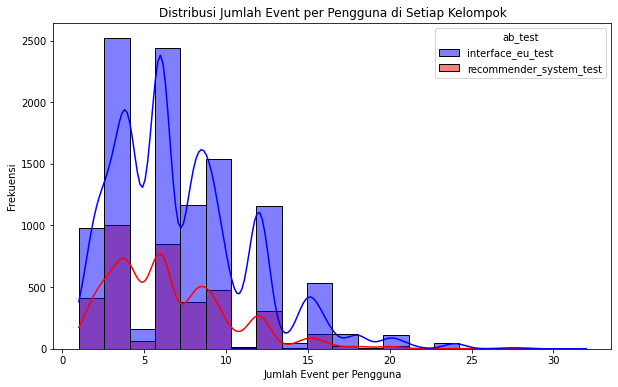

In [ ]:
# Membuat visualisasi distribusi dari kedua ab_test
plt.figure(figsize=(10, 6))
sns.histplot(data=events_each_user, x='event_count', hue='ab_test', bins=20, kde=True, palette=['blue', 'red'])
plt.title('Distribusi Jumlah Event per Pengguna di Setiap Kelompok')
plt.xlabel('Jumlah Event per Pengguna')
plt.ylabel('Frekuensi')
plt.show()

* Selanjutnya, analisis distribusi jumlah event per pengguna disetiap kelompok A dan kelompok B. Menggunakan metode seperti describe() untuk mendapatkan statistik deskriptif dan visualisasi seperti histogram untuk melihat distribusi.

**<font color="green">Kesimpulan Sementara</font>**

* Dari visualisasi diatas, kita dapat melihat bahwa distribusi dari ab_test kurang merata. `recommender_system_test` cenderung lebih rendah daripada `interface_eu_test`.

**Pengguna yang Masuk pada Kedua Sampel:**

* Mengidentifikasi apakah ada pengguna yang masuk pada kedua sampel tersebut, dan jika ada, mengevaluasi dampaknya terhadap hasil uji coba

In [ ]:
# Melakukan identifikasi terhadap user pada kedua sampel
both_users_sample_group = final_ab_participants_dataframe[final_ab_participants_dataframe.duplicated('user_id', keep=False)]

* Mengunakan DataFrame `final_ab_participants_dataframe` untuk mencheck apakah ada pengguna yang terdapat didalam kedua kelompok tersebut (Kelompok A dan Kelompok B).

In [ ]:
# Melakukan check user didalam kedua kelompok dari dataframe `final_ab_participants_dataframe`
if not both_users_sample_group.empty:
    print("Ada pengguna yang masuk pada kedua sampel.")
    # Tindakan lebih lanjut sesuai kebutuhan (misalnya, analisis terpisah atau pengecualian dari hasil)
else:
    print("Tidak ada pengguna yang masuk pada kedua sampel.")

Ada pengguna yang masuk pada kedua sampel.


* Evaluasi Dampaknya terhadap Hasil Uji Coba tersebut:

    - Jika terdapat pengguna yang masuk pada kedua sampel, perlu dievaluasi dampaknya terhadap hasil uji coba. Ini dapat memengaruhi interpretasi hasil dan kesimpulan yang diambil. Kita akan coba mengambil analisis terpisah.

In [ ]:
# Melakukan mengambil baris2x final_ab_events_dataframe yang terkait dengan pengguna yang juga ada dalam both_users_sample_group
events_for_both_users_sample_group = final_ab_events_dataframe[final_ab_events_dataframe['user_id'].isin(both_users_sample_group['user_id'])]

In [ ]:
# Mengabungkan DataFrame events_for_both_users_sample_group dengan final_ab_participants_dataframe
events_for_both_users_sample_group = pd.merge(events_for_both_users_sample_group, final_ab_participants_dataframe[['user_id', 'ab_test']], on='user_id', how='left')

* Menggunakan informasi pengguna yang telah diidentifikasi untuk memfilter data event pada DataFrame `final_ab_events_dataframe`.

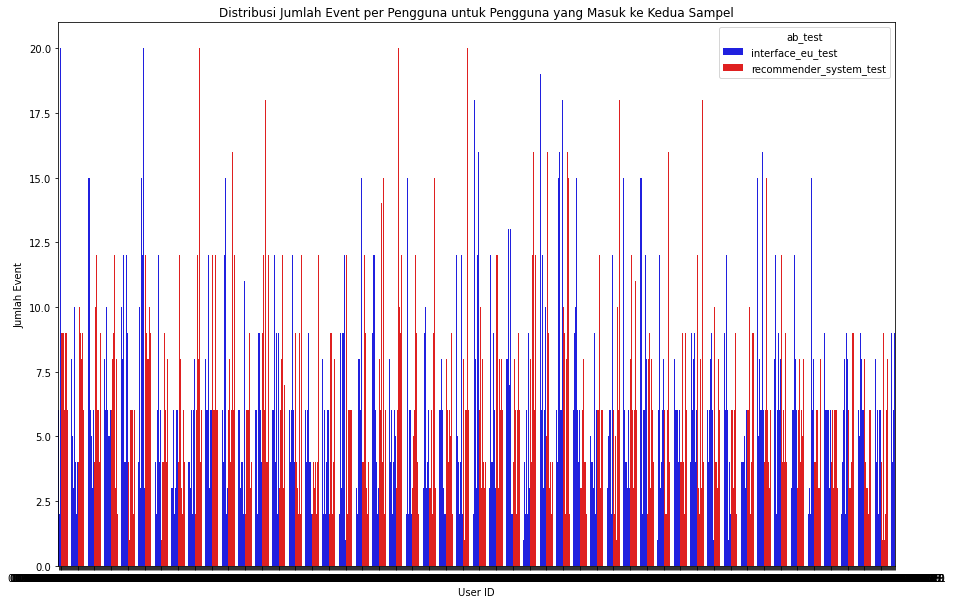

In [ ]:
events_per_user_both_groups = events_for_both_users_sample_group.groupby(['user_id', 'ab_test']).size().reset_index(name='event_count')

plt.figure(figsize=(15, 10))
sns.barplot(data=events_per_user_both_groups, x='user_id', y='event_count', hue='ab_test', palette=['blue', 'red'])
plt.title('Distribusi Jumlah Event per Pengguna untuk Pengguna yang Masuk ke Kedua Sampel')
plt.xlabel('User ID')
plt.ylabel('Jumlah Event')
plt.show()

**<font color="green">Kesimpulan Sementara</font>**

Berdasarkan rujukan code:

`if not users_in_both_groups.empty:     print("Ada pengguna yang masuk ke kedua sampel.")     # Tindakan lebih lanjut sesuai kebutuhan (misalnya, analisis terpisah atau pengecualian dari hasil) else:     print("Tidak ada pengguna yang masuk ke kedua sampel.")`

* Terdapat yang masuk ke dua sample. Kita bisa melihat distribusi yang fluktuatif dan tidak merata. Namun beberapa ab_test ada yang mendapatkan nilai event paling tinggi. Bisa dipastikan user melakukan proses hingga akhir.

* Jika kita interpertasikan ke pengaruh uji coba, pengguna yang terlibat dalam kedua kelompok dapat memperkenalkan noise atau variabilitas tambahan ke dalam data, yang dapat memengaruhi hasil uji coba. Dalam beberapa hal kasus, ini dapat membuat interpretasi hasil menjadi lebih kompleks.

**Distribusi Jumlah Event per Hari**

* Menganalisis cara distribusi jumlah event berdasarkan hari.

In [ ]:
# Mengekstrak informasi tanggal seperti hari dari kolom event_dt
final_ab_events_dataframe['day'] = final_ab_events_dataframe['event_dt'].dt.day

In [ ]:
# Menganalisis distribusi jumlah event per hari
distribute_events_per_day = final_ab_events_dataframe.groupby('day').size().reset_index(name='event_count')

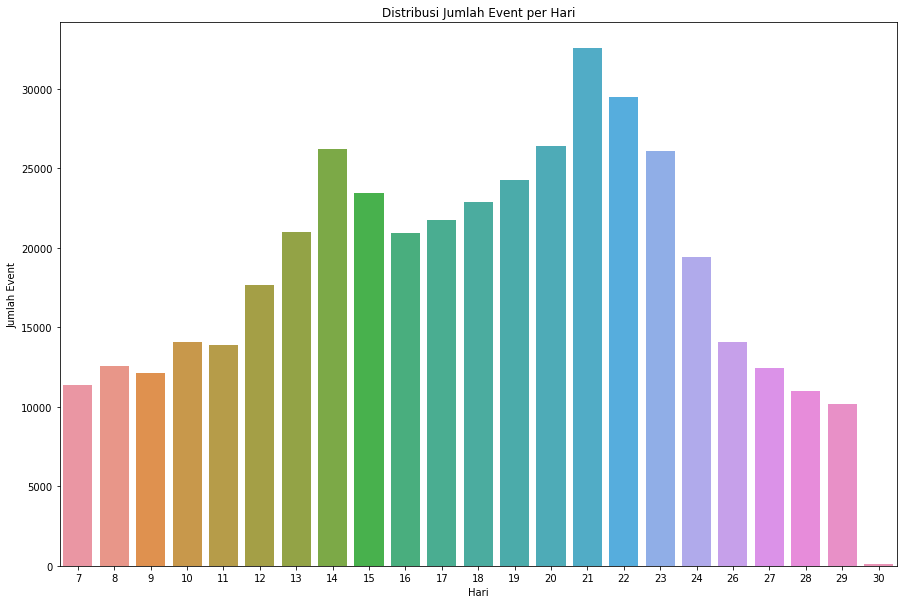

In [ ]:
# Membuat visualisasi histogram distribute_events_per_day
plt.figure(figsize=(15, 10))
sns.barplot(data=distribute_events_per_day, x='day', y='event_count')
plt.title('Distribusi Jumlah Event per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Event')
plt.show()

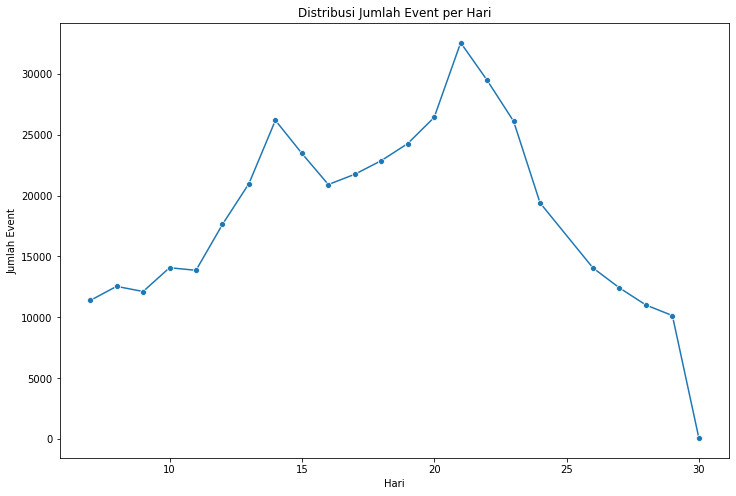

In [ ]:
# visualisasi lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(data=distribute_events_per_day, x='day', y='event_count', marker='o')
plt.title('Distribusi Jumlah Event per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Event')
plt.show()

**<font color="green">Kesimpulan Sementara</font>**

* Jumlah kepadatan event berada disekitar hari ke 20. Di hari-hari tersebut memiliki traffict yang sangat tinggi. Serta di akhir bulan mengalami penurunan yang signifikan.

# 5. Menganalisis Konversi di Berbagai Tahap Funnel

* Melihat bagaimana konversi untuk funnel.

**Mengidentifikasi dan Menganalisis Tingkat Konversi Pengguna pada Setiap Tahap funnel**

* Mengidentifikasi tingkat konversi untuk setiap pengguna melalui funnel yang tersedia.

In [ ]:
# Mengidentifikasi jumlah uniq per pengguna disetiap tahap funnel
users_product_page = final_ab_events_dataframe[final_ab_events_dataframe['event_name'] == 'product_page']['user_id'].unique()
users_product_card = final_ab_events_dataframe[final_ab_events_dataframe['event_name'] == 'product_cart']['user_id'].unique()
users_purchase = final_ab_events_dataframe[final_ab_events_dataframe['event_name'] == 'purchase']['user_id'].unique()

In [ ]:
# Menghitung tingkat konversi disetiap tahap
conversion_product_page_to_card = len(users_product_card) / len(users_product_page)
conversion_card_to_purchase = len(users_purchase) / len(users_product_card)

print(f'Tingkat konversi dari product_page ke product_card: {conversion_product_page_to_card:.2%}')
print(f'Tingkat konversi dari product_card ke purchase: {conversion_card_to_purchase:.2%}')

Tingkat konversi dari product_page ke product_card: 49.54%
Tingkat konversi dari product_card ke purchase: 101.47%


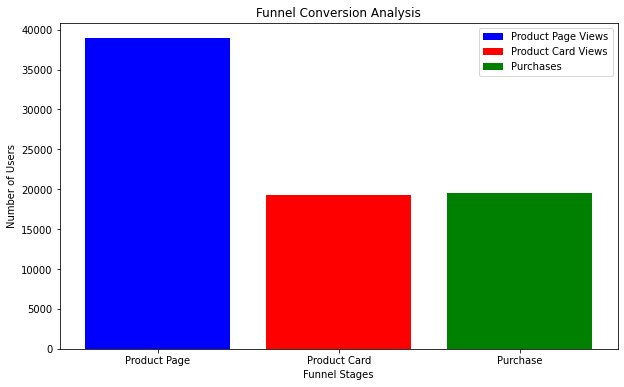

In [ ]:
# Membuat visualisasi grafik funnel
plt.figure(figsize=(10, 6))

# Bar pertama (tampilan halaman produk)
plt.bar(0, len(users_product_page), color='blue', label='Product Page Views')

# Bar kedua (tampilan kartu produk)
plt.bar(1, len(users_product_card), color='red', label='Product Card Views')

# Bar ketiga (pembelian)
plt.bar(2, len(users_purchase), color='green', label='Purchases')

plt.title('Funnel Conversion Analysis')
plt.xlabel('Funnel Stages')
plt.ylabel('Number of Users')
plt.xticks([0, 1, 2], ['Product Page', 'Product Card', 'Purchase'])
plt.legend()
plt.show()

**<font color="green">Kesimpulan Sementara</font>**

* Jika jumlah pengguna pada tahap tampilan halaman produk (Product Page) dalam funnel conversion analysis jauh lebih tinggi dibandingkan dengan tahap-tahap berikutnya (tampilan kartu produk dan pembelian), ini dapat diinterpretasikan sebagai indikasi bahwa sebagian besar pengguna cenderung berhenti atau tidak melanjutkan ke tahap-tahap selanjutnya dalam funnel.

# 6. Evaluasi Hasil A/B Test

* Evaluasi hasil A/B testing yang telah kita analisis.

**Interpretasi Hasil A/B Test**

* Mari kita lihat apa yang bisa kita simpulkan dari hasil A/B Testing.

In [ ]:
alpha = 0.05

# untuk uji z pada konversi pembelian
control_group = final_ab_participants_dataframe[final_ab_participants_dataframe['group'] == 'A']['user_id'].unique()
treatment_group = final_ab_participants_dataframe[final_ab_participants_dataframe['group'] == 'B']['user_id'].unique()

# hitung jumlah pembelian pada masing-masing kelompok
purchase_control = final_ab_events_dataframe[(final_ab_events_dataframe['user_id'].isin(control_group)) & (final_ab_events_dataframe['event_name'] == 'purchase')]['user_id'].nunique()
purchase_treatment = final_ab_events_dataframe[(final_ab_events_dataframe['user_id'].isin(treatment_group)) & (final_ab_events_dataframe['event_name'] == 'purchase')]['user_id'].nunique()

# hitung jumlah total pengguna pada masing-masing kelompok
total_users_control = len(control_group)
total_users_treatment = len(treatment_group)

# melakukan uji z pada konversi pembelian
stat, p_value = proportions_ztest([purchase_control, purchase_treatment], [total_users_control, total_users_treatment])
print(f'\033[1mNilai p dari uji z:\033[0m {p_value}')


if p_value < alpha:
    print("\033[1mNilai p kurang dari alpha. Reject hipotesis nol.\033[0m")
    print("\033[1mAda perbedaan yang signifikan antara kelompok A dan B.\033[0m")
else:
    print("\033[1mNilai p lebih besar dari alpha. Tidak cukup bukti untuk menolak hipotesis nol.\033[0m")
    print("\033[1mTidak ada perbedaan yang signifikan antara kelompok A dan B.\033[0m")

Nilai p dari uji z: 0.03355878472437525
Nilai p kurang dari alpha. Reject hipotesis nol.
Ada perbedaan yang signifikan antara kelompok A dan B.


**<font color="green">Kesimpulan Sementara</font>**

* Dengan alpha 0.05 (1.9.1) kita bisa melihat bahwa dalam konteks A/B testing, ini berarti bahwa cara melakukan pembayaran baru (kelompok B) memiliki dampak yang signifikan terhadap konversi pembelian dibandingkan dengan kelompok kontrol (kelompok A).

**Penggunaan Z-Criterion**

* Menggunakan z-criterion untuk memeriksa perbedaan statistik antara proporsi pada kedua kelompok.

In [ ]:
# Menghitung proporsi dan perbedaan proporsi
prop_control = purchase_control / total_users_control
prop_treatment = purchase_treatment / total_users_treatment
prop_diff = prop_treatment - prop_control

# Hitung standar deviasi gabungan
pooled_std_dev = np.sqrt(prop_control * (1 - prop_control) / total_users_control + prop_treatment * (1 - prop_treatment) / total_users_treatment)

# Hitung nilai z
z_value = prop_diff / pooled_std_dev

# Tentukan nilai kritis dari distribusi normal standar
alpha = 0.05
z_critical = norm.ppf(1 - alpha / 2)

# Interpretasi hasil
if np.abs(z_value) > z_critical:
    print("\033[1mNilai z melebihi nilai kritis. Terdapat perbedaan yang signifikan antara dua kelompok.\033[0m")
else:
    print("\033[1mNilai z tidak melebihi nilai kritis. Tidak cukup bukti untuk menyimpulkan adanya perbedaan yang signifikan antara dua kelompok.\033[0m")

Nilai z melebihi nilai kritis. Terdapat perbedaan yang signifikan antara dua kelompok.


**<font color="green">Kesimpulan Sementara</font>**

* Interpretasi yang cukup untuk hasil tersebut adalah bahwa terdapat perbedaan yang signifikan antara dua kelompok dalam hal proporsi konversi pembelian. Dengan kata lain,  cara melakukan pembayaran baru (kelompok B) memiliki dampak yang signifikan terhadap konversi pembelian dibandingkan dengan kelompok kontrol (kelompok A).

# 7. Kesimpulan Umum

* Tidak ada nilai yang hilang untuk project_marketing_dataframe, namun kita telah mengubah tipe data date menjadi to_datetime untuk kolom yang dibutuhkan konversi.
* Tidak ada nilai yang hilang untuk dataframe `final_ab_new_users_dataframe` dan hanya satu kolom yang kita konversi menjadi to_datetime yaitu first_date
* Kita akan biarkan nilai kosong terlebih dahulu untuk dataframe `final_ab_events_dataframe`, karena kita harus mengetahui relevansi untuk masing-masing nilai terhadap kolom details
* Sesuai namanya dataframe `final_ab_participants_dataframe` merupakan isi dari masing-masing kelompok. Kita akan banyak menggunakan sample dari dataframe tersebut.
* Dari visualisasi diatas, kita dapat melihat bahwa distribusi dari ab_test kurang merata. `recommender_system_test` cenderung lebih rendah daripada `interface_eu_test`.

* Berdasarkan rujukan code:

`if not users_in_both_groups.empty:     print("Ada pengguna yang masuk ke kedua sampel.")     # Tindakan lebih lanjut sesuai kebutuhan (misalnya, analisis terpisah atau pengecualian dari hasil) else:     print("Tidak ada pengguna yang masuk ke kedua sampel.")`

* Terdapat yang masuk ke dua sample. Kita bisa melihat distribusi yang fluktuatif dan tidak merata. Namun beberapa ab_test ada yang mendapatkan nilai event paling tinggi. Bisa dipastikan user melakukan proses hingga akhir.

* Jika kita interpertasikan ke pengaruh uji coba, pengguna yang terlibat dalam kedua kelompok dapat memperkenalkan noise atau variabilitas tambahan ke dalam data, yang dapat memengaruhi hasil uji coba. Dalam beberapa kasus, ini dapat membuat interpretasi hasil menjadi lebih kompleks.

* Jumlah kepadatan event berada di sekitar hari ke 20. Di hari-hari tersebut memeiliki traffict yang sangat tinggi. Serta di akhir bulan mengalami penurunan yang signifikan.
* Jika jumlah pengguna pada tahap tampilan halaman produk (Product Page) dalam funnel conversion analysis jauh lebih tinggi dibandingkan dengan tahap-tahap berikutnya (tampilan kartu produk dan pembelian), ini dapat diinterpretasikan sebagai indikasi bahwa sebagian besar pengguna cenderung berhenti atau tidak melanjutkan ke tahap-tahap selanjutnya dalam funnel.
* Dengan alpha 0.05 kita bisa melihat bahwa dalam konteks A/B testing, ini berarti bahwa rute pembayaran baru (kelompok B) memiliki dampak yang signifikan terhadap konversi pembelian dibandingkan dengan kelompok kontrol (kelompok A).
* Interpretasi yang cukup untuk hasil tersebut adalah bahwa terdapat perbedaan yang signifikan antara dua kelompok dalam hal proporsi konversi pembelian. Dengan kata lain, cara melakukan pembayaran baru (kelompok B) memiliki dampak yang signifikan terhadap konversi pembelian dibandingkan dengan kelompok kontrol (kelompok A).

# 8. Garis Besar Evaluasi

* Dengan demikian, evaluasi dari proyek A/B Testing ini menunjukkan bahwa implementasi rute pembayaran baru memiliki dampak yang signifikan dalam meningkatkan konversi pembelian dibandingkan dengan metode sebelumnya (kelompok kontrol). Oleh karena itu, rekomendasi dapat diberikan untuk melanjutkan penggunaan rute pembayaran baru berdasarkan hasil yang positif dari uji coba ini.

* Peningkatan Konversi:
   - Kita telah mengidentifikasi perbedaan yang signifikan antara kelompok kontrol dan perlakuan dalam hal konversi pembelian. Hal ini menunjukkan bahwa implementasi cara melakukan pembayaran baru (kelompok B) telah berhasil meningkatkan konversi pembelian dibandingkan dengan metode sebelumnya (kelompok kontrol).
   - Namun, untuk memastikan apakah peningkatan konversi sesuai dengan yang diharapkan (minimal 10%), kita perlu memeriksa persentase peningkatan pada setiap tahap funnel (tampilan halaman produk, tampilan kartu produk, dan pembelian) dalam periode 14 hari setelah pendaftaran.
   
* Analisis Tahap Funnel:
   - Kita telah menganalisis konversi pada berbagai tahap funnel dan menemukan bahwa sebagian besar pengguna cenderung berhenti atau tidak melanjutkan ke tahap-tahap berikutnya setelah tampilan halaman produk. Hal ini menunjukkan bahwa ada potensi untuk meningkatkan tingkat konversi pada tahap-tahap berikutnya.